In [1]:
import os
import torch
import pwcca
import timeit
import random
import librosa
import opensmile
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn
import soundfile as sf
from scipy import signal
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler, normalize
from transformers import Wav2Vec2Model, Wav2Vec2Processor
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
w2v_model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base").to(device)
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base")

/afs/inf.ed.ac.uk/user/s20/s2057508/.local/lib/python3.6/site-packages/transformers/configuration_utils.py:357: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  "Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 "
Some weights of the model checkpoint at facebook/wav2vec2-base were not used when initializing Wav2Vec2Model: ['quantizer.weight_proj.bias', 'project_hid.weight', 'quantizer.weight_proj.weight', 'project_q.weight', 'project_hid.bias', 'quantizer.codevectors', 'project_q.bias']
- This IS expected if you are initializing Wav2Vec2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTrain

In [3]:
# feature extraction

smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
)

path = '/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/Corpora/RAVDESS/Data'

# hct1_A = np.array([])
# hct1_H = np.array([])
# hct1_N = np.array([])
# hct1_S = np.array([])
# hct1_C = np.array([])
# hct1_D = np.array([])
# hct1_F = np.array([])
# hct1_X = np.array([])

# hct2_A = np.array([])
# hct2_H = np.array([])
# hct2_N = np.array([])
# hct2_S = np.array([])
# hct2_C = np.array([])
# hct2_D = np.array([])
# hct2_F = np.array([])
# hct2_X = np.array([])

# hct3_A = np.array([])
# hct3_H = np.array([])
# hct3_N = np.array([])
# hct3_S = np.array([])
# hct3_C = np.array([])
# hct3_D = np.array([])
# hct3_F = np.array([])
# hct3_X = np.array([])

# hct4_A = np.array([])
# hct4_H = np.array([])
# hct4_N = np.array([])
# hct4_S = np.array([])
# hct4_C = np.array([])
# hct4_D = np.array([])
# hct4_F = np.array([])
# hct4_X = np.array([])

hct5_A = np.array([])
hct5_H = np.array([])
hct5_N = np.array([])
hct5_S = np.array([])
hct5_C = np.array([])
hct5_D = np.array([])
hct5_F = np.array([])
hct5_X = np.array([])

w2v0_A = np.array([])
w2v0_H = np.array([])
w2v0_N = np.array([])
w2v0_S = np.array([])
w2v0_C = np.array([])
w2v0_D = np.array([])
w2v0_F = np.array([])
w2v0_X = np.array([])

w2v1_A = np.array([])
w2v1_H = np.array([])
w2v1_N = np.array([])
w2v1_S = np.array([])
w2v1_C = np.array([])
w2v1_D = np.array([])
w2v1_F = np.array([])
w2v1_X = np.array([])

w2v2_A = np.array([])
w2v2_H = np.array([])
w2v2_N = np.array([])
w2v2_S = np.array([])
w2v2_C = np.array([])
w2v2_D = np.array([])
w2v2_F = np.array([])
w2v2_X = np.array([])

w2v3_A = np.array([])
w2v3_H = np.array([])
w2v3_N = np.array([])
w2v3_S = np.array([])
w2v3_C = np.array([])
w2v3_D = np.array([])
w2v3_F = np.array([])
w2v3_X = np.array([])

w2v4_A = np.array([])
w2v4_H = np.array([])
w2v4_N = np.array([])
w2v4_S = np.array([])
w2v4_C = np.array([])
w2v4_D = np.array([])
w2v4_F = np.array([])
w2v4_X = np.array([])

w2v5_A = np.array([])
w2v5_H = np.array([])
w2v5_N = np.array([])
w2v5_S = np.array([])
w2v5_C = np.array([])
w2v5_D = np.array([])
w2v5_F = np.array([])
w2v5_X = np.array([])

w2v6_A = np.array([])
w2v6_H = np.array([])
w2v6_N = np.array([])
w2v6_S = np.array([])
w2v6_C = np.array([])
w2v6_D = np.array([])
w2v6_F = np.array([])
w2v6_X = np.array([])

w2v7_A = np.array([])
w2v7_H = np.array([])
w2v7_N = np.array([])
w2v7_S = np.array([])
w2v7_C = np.array([])
w2v7_D = np.array([])
w2v7_F = np.array([])
w2v7_X = np.array([])

w2v8_A = np.array([])
w2v8_H = np.array([])
w2v8_N = np.array([])
w2v8_S = np.array([])
w2v8_C = np.array([])
w2v8_D = np.array([])
w2v8_F = np.array([])
w2v8_X = np.array([])

w2v9_A = np.array([])
w2v9_H = np.array([])
w2v9_N = np.array([])
w2v9_S = np.array([])
w2v9_C = np.array([])
w2v9_D = np.array([])
w2v9_F = np.array([])
w2v9_X = np.array([])

w2v10_A = np.array([])
w2v10_H = np.array([])
w2v10_N = np.array([])
w2v10_S = np.array([])
w2v10_C = np.array([])
w2v10_D = np.array([])
w2v10_F = np.array([])
w2v10_X = np.array([])

w2v11_A = np.array([])
w2v11_H = np.array([])
w2v11_N = np.array([])
w2v11_S = np.array([])
w2v11_C = np.array([])
w2v11_D = np.array([])
w2v11_F = np.array([])
w2v11_X = np.array([])

w2v12_A = np.array([])
w2v12_H = np.array([])
w2v12_N = np.array([])
w2v12_S = np.array([])
w2v12_C = np.array([])
w2v12_D = np.array([])
w2v12_F = np.array([])
w2v12_X = np.array([])

n = 1
for dirname, dirs, filenames in os.walk(path):
    #dirs[:] = [d for d in dirs if d in subset_dirs_list] # you can remove it to train the model over the entire dataset 
    for filename in filenames:
        print(n)
        #print(os.path.join(dirname, filename))
        emotion = filename[7] # the index 7 and 8 of the file name represent the emotion label
        file_name = os.path.join(dirname, filename)
        audioinput, sr = librosa.load(file_name, sr=16000)

        torch.cuda.empty_cache()

        feats = smile.process_signal(audioinput, sr).values
        
#         egmaps1 = []
#         egmaps2 = []
#         egmaps3 = []
#         egmaps4 = []

# # frequency
#         egmaps1.append(feats['F0semitoneFrom27.5Hz_sma3nz'].values)
#         egmaps1.append(feats['F1frequency_sma3nz'].values)
#         egmaps1.append(feats['F1bandwidth_sma3nz'].values)
#         egmaps1.append(feats['F2frequency_sma3nz'].values)
#         egmaps1.append(feats['F3frequency_sma3nz'].values)
        
# # energy
#         egmaps2.append(feats['Loudness_sma3'].values)
#         egmaps2.append(feats['HNRdBACF_sma3nz'].values)

# # spectral
#         egmaps3.append(feats['alphaRatio_sma3'].values)
#         egmaps3.append(feats['hammarbergIndex_sma3'].values)
#         egmaps3.append(feats['slope0-500_sma3'].values)
#         egmaps3.append(feats['slope500-1500_sma3'].values)
#         egmaps3.append(feats['logRelF0-H1-H2_sma3nz'].values)
#         egmaps3.append(feats['logRelF0-H1-A3_sma3nz'].values)
#         egmaps3.append(feats['F1amplitudeLogRelF0_sma3nz'].values)
#         egmaps3.append(feats['F2amplitudeLogRelF0_sma3nz'].values)
#         egmaps3.append(feats['F3amplitudeLogRelF0_sma3nz'].values)

# # voice quality
#         egmaps4.append(feats['jitterLocal_sma3nz'].values)
#         egmaps4.append(feats['shimmerLocaldB_sma3nz'].values)

# #     spectral features
#         mfcc = librosa.feature.mfcc(y=audioinput, sr=sr, n_fft=400, hop_length=160, n_mfcc=20).T
        
#         mel = librosa.feature.melspectrogram(y=audioinput, sr=sr, n_fft=400, hop_length=160, power=1.0).T
        
#         egmaps1 = np.array(egmaps1).T
#         egmaps2 = np.array(egmaps2).T
#         egmaps3 = np.array(egmaps3).T
#         egmaps4 = np.array(egmaps4).T
        
#         egmaps1 = np.mean(egmaps1, axis=0).reshape(1, -1)
#         egmaps2 = np.mean(egmaps2, axis=0).reshape(1, -1)
#         egmaps3 = np.mean(egmaps3, axis=0).reshape(1, -1)
#         egmaps4 = np.mean(egmaps4, axis=0).reshape(1, -1)
#         mfcc = np.mean(mfcc, axis=0).reshape(1, -1)
        
#         print(egmaps1.shape, egmaps2.shape, egmaps3.shape, egmaps4.shape, mfcc.shape)
    
        #w2v features
        input_values = processor(audioinput, sampling_rate=16000, return_tensors="pt").input_values.to(device)
        w2v_feats = w2v_model(input_values, output_hidden_states=True).hidden_states
        w2v0 = np.array(w2v_feats[0].detach()[0].cpu())
        w2v1 = np.array(w2v_feats[1].detach()[0].cpu())
        w2v2 = np.array(w2v_feats[2].detach()[0].cpu())
        w2v3 = np.array(w2v_feats[3].detach()[0].cpu())
        w2v4 = np.array(w2v_feats[4].detach()[0].cpu())
        w2v5 = np.array(w2v_feats[5].detach()[0].cpu())
        w2v6 = np.array(w2v_feats[6].detach()[0].cpu())
        w2v7 = np.array(w2v_feats[7].detach()[0].cpu())
        w2v8 = np.array(w2v_feats[8].detach()[0].cpu())
        w2v9 = np.array(w2v_feats[9].detach()[0].cpu())
        w2v10 = np.array(w2v_feats[10].detach()[0].cpu())
        w2v11 = np.array(w2v_feats[11].detach()[0].cpu())
        w2v12 = np.array(w2v_feats[12].detach()[0].cpu())
        
#         egmaps1 = signal.resample(egmaps1, len(w2v0))
#         egmaps2 = signal.resample(egmaps2, len(w2v0))
#         egmaps3 = signal.resample(egmaps3, len(w2v0))
#         egmaps4 = signal.resample(egmaps4, len(w2v0))
#         mfcc = signal.resample(mfcc, len(w2v0))
        feats = signal.resample(feats, len(w2v0))

        torch.cuda.empty_cache()
            
    #separate accroindg to emotions
        if emotion == '1':
            if len(w2v0_N) > 0:
                w2v0_N = np.concatenate((w2v0_N, w2v0), axis=0)
                w2v1_N = np.concatenate((w2v1_N, w2v1), axis=0)
                w2v2_N = np.concatenate((w2v2_N, w2v2), axis=0)
                w2v3_N = np.concatenate((w2v3_N, w2v3), axis=0)
                w2v4_N = np.concatenate((w2v4_N, w2v4), axis=0)
                w2v5_N = np.concatenate((w2v5_N, w2v5), axis=0)
                w2v6_N = np.concatenate((w2v6_N, w2v6), axis=0)
                w2v7_N = np.concatenate((w2v7_N, w2v7), axis=0)
                w2v8_N = np.concatenate((w2v8_N, w2v8), axis=0)
                w2v9_N = np.concatenate((w2v9_N, w2v9), axis=0)
                w2v10_N = np.concatenate((w2v10_N, w2v10), axis=0)
                w2v11_N = np.concatenate((w2v11_N, w2v11), axis=0)
                w2v12_N = np.concatenate((w2v12_N, w2v12), axis=0)
#                 hct1_N = np.concatenate((hct1_N, egmaps1), axis=0)
#                 hct2_N = np.concatenate((hct2_N, egmaps2), axis=0)
#                 hct3_N = np.concatenate((hct3_N, egmaps3), axis=0)
#                 hct4_N = np.concatenate((hct4_N, egmaps4), axis=0)
#                 hct5_N = np.concatenate((hct5_N, mfcc), axis=0)        
                hct5_N = np.concatenate((hct5_N, feats), axis=0)                

            else:
                w2v0_N = w2v0
                w2v1_N = w2v1
                w2v2_N = w2v2
                w2v3_N = w2v3
                w2v4_N = w2v4
                w2v5_N = w2v5
                w2v6_N = w2v6
                w2v7_N = w2v7
                w2v8_N = w2v8
                w2v9_N = w2v9
                w2v10_N = w2v10
                w2v11_N = w2v11
                w2v12_N = w2v12
#                 hct1_N = egmaps1
#                 hct2_N = egmaps2
#                 hct3_N = egmaps3
#                 hct4_N = egmaps4
#                 hct5_N = mfcc
                hct5_N = feats

        elif emotion == '2':
            if len(w2v0_C) > 0:
                w2v0_C = np.concatenate((w2v0_C, w2v0), axis=0)
                w2v1_C = np.concatenate((w2v1_C, w2v1), axis=0)
                w2v2_C = np.concatenate((w2v2_C, w2v2), axis=0)
                w2v3_C = np.concatenate((w2v3_C, w2v3), axis=0)
                w2v4_C = np.concatenate((w2v4_C, w2v4), axis=0)
                w2v5_C = np.concatenate((w2v5_C, w2v5), axis=0)
                w2v6_C = np.concatenate((w2v6_C, w2v6), axis=0)
                w2v7_C = np.concatenate((w2v7_C, w2v7), axis=0)
                w2v8_C = np.concatenate((w2v8_C, w2v8), axis=0)
                w2v9_C = np.concatenate((w2v9_C, w2v9), axis=0)
                w2v10_C = np.concatenate((w2v10_C, w2v10), axis=0)
                w2v11_C = np.concatenate((w2v11_C, w2v11), axis=0)
                w2v12_C = np.concatenate((w2v12_C, w2v12), axis=0)             
#                 hct1_C = np.concatenate((hct1_C, egmaps1), axis=0)
#                 hct2_C = np.concatenate((hct2_C, egmaps2), axis=0)
#                 hct3_C = np.concatenate((hct3_C, egmaps3), axis=0)
#                 hct4_C = np.concatenate((hct4_C, egmaps4), axis=0)
#                 hct5_C = np.concatenate((hct5_C, mfcc), axis=0)
                hct5_C = np.concatenate((hct5_C, feats), axis=0)  
            else:
                w2v0_C = w2v0
                w2v1_C = w2v1
                w2v2_C = w2v2
                w2v3_C = w2v3
                w2v4_C = w2v4
                w2v5_C = w2v5
                w2v6_C = w2v6
                w2v7_C = w2v7
                w2v8_C = w2v8
                w2v9_C = w2v9
                w2v10_C = w2v10
                w2v11_C = w2v11
                w2v12_C = w2v12
#                 hct1_C = egmaps1
#                 hct2_C = egmaps2
#                 hct3_C = egmaps3
#                 hct4_C = egmaps4
#                 hct5_C = mfcc
                hct5_C = feats

        elif emotion == '3':
            if len(w2v0_H) > 0:
                w2v0_H = np.concatenate((w2v0_H, w2v0), axis=0)
                w2v1_H = np.concatenate((w2v1_H, w2v1), axis=0)
                w2v2_H = np.concatenate((w2v2_H, w2v2), axis=0)
                w2v3_H = np.concatenate((w2v3_H, w2v3), axis=0)
                w2v4_H = np.concatenate((w2v4_H, w2v4), axis=0)
                w2v5_H = np.concatenate((w2v5_H, w2v5), axis=0)
                w2v6_H = np.concatenate((w2v6_H, w2v6), axis=0)
                w2v7_H = np.concatenate((w2v7_H, w2v7), axis=0)
                w2v8_H = np.concatenate((w2v8_H, w2v8), axis=0)
                w2v9_H = np.concatenate((w2v9_H, w2v9), axis=0)
                w2v10_H = np.concatenate((w2v10_H, w2v10), axis=0)
                w2v11_H = np.concatenate((w2v11_H, w2v11), axis=0)
                w2v12_H = np.concatenate((w2v12_H, w2v12), axis=0)
#                 hct1_H = np.concatenate((hct1_H, egmaps1), axis=0)
#                 hct2_H = np.concatenate((hct2_H, egmaps2), axis=0)
#                 hct3_H = np.concatenate((hct3_H, egmaps3), axis=0)
#                 hct4_H = np.concatenate((hct4_H, egmaps4), axis=0)
#                 hct5_H = np.concatenate((hct5_H, mfcc), axis=0)
                hct5_H = np.concatenate((hct5_H, feats), axis=0)  
            else:
                w2v0_H = w2v0
                w2v1_H = w2v1
                w2v2_H = w2v2
                w2v3_H = w2v3
                w2v4_H = w2v4
                w2v5_H = w2v5
                w2v6_H = w2v6
                w2v7_H = w2v7
                w2v8_H = w2v8
                w2v9_H = w2v9
                w2v10_H = w2v10
                w2v11_H = w2v11
                w2v12_H = w2v12
#                 hct1_H = egmaps1
#                 hct2_H = egmaps2
#                 hct3_H = egmaps3
#                 hct4_H = egmaps4
#                 hct5_H = mfcc
                hct5_H = feats

        elif emotion == '4':
            if len(w2v0_S) > 0:
                w2v0_S = np.concatenate((w2v0_S, w2v0), axis=0)
                w2v1_S = np.concatenate((w2v1_S, w2v1), axis=0)
                w2v2_S = np.concatenate((w2v2_S, w2v2), axis=0)
                w2v3_S = np.concatenate((w2v3_S, w2v3), axis=0)
                w2v4_S = np.concatenate((w2v4_S, w2v4), axis=0)
                w2v5_S = np.concatenate((w2v5_S, w2v5), axis=0)
                w2v6_S = np.concatenate((w2v6_S, w2v6), axis=0)
                w2v7_S = np.concatenate((w2v7_S, w2v7), axis=0)
                w2v8_S = np.concatenate((w2v8_S, w2v8), axis=0)
                w2v9_S = np.concatenate((w2v9_S, w2v9), axis=0)
                w2v10_S = np.concatenate((w2v10_S, w2v10), axis=0)
                w2v11_S = np.concatenate((w2v11_S, w2v11), axis=0)
                w2v12_S = np.concatenate((w2v12_S, w2v12), axis=0)
#                 hct1_S = np.concatenate((hct1_S, egmaps1), axis=0)
#                 hct2_S = np.concatenate((hct2_S, egmaps2), axis=0)
#                 hct3_S = np.concatenate((hct3_S, egmaps3), axis=0)
#                 hct4_S = np.concatenate((hct4_S, egmaps4), axis=0)
#                 hct5_S = np.concatenate((hct5_S, mfcc), axis=0)
                hct5_S = np.concatenate((hct5_S, feats), axis=0)  
            else:
                w2v0_S = w2v0
                w2v1_S = w2v1
                w2v2_S = w2v2
                w2v3_S = w2v3
                w2v4_S = w2v4
                w2v5_S = w2v5
                w2v6_S = w2v6
                w2v7_S = w2v7
                w2v8_S = w2v8
                w2v9_S = w2v9
                w2v10_S = w2v10
                w2v11_S = w2v11
                w2v12_S = w2v12
#                 hct1_S = egmaps1
#                 hct2_S = egmaps2
#                 hct3_S = egmaps3
#                 hct4_S = egmaps4
#                 hct5_S = mfcc
                hct5_S = feats

        elif emotion == '5':
            if len(w2v0_A) > 0:
                w2v0_A = np.concatenate((w2v0_A, w2v0), axis=0)
                w2v1_A = np.concatenate((w2v1_A, w2v1), axis=0)
                w2v2_A = np.concatenate((w2v2_A, w2v2), axis=0)
                w2v3_A = np.concatenate((w2v3_A, w2v3), axis=0)
                w2v4_A = np.concatenate((w2v4_A, w2v4), axis=0)
                w2v5_A = np.concatenate((w2v5_A, w2v5), axis=0)
                w2v6_A = np.concatenate((w2v6_A, w2v6), axis=0)
                w2v7_A = np.concatenate((w2v7_A, w2v7), axis=0)
                w2v8_A = np.concatenate((w2v8_A, w2v8), axis=0)
                w2v9_A = np.concatenate((w2v9_A, w2v9), axis=0)
                w2v10_A = np.concatenate((w2v10_A, w2v10), axis=0)
                w2v11_A = np.concatenate((w2v11_A, w2v11), axis=0)
                w2v12_A = np.concatenate((w2v12_A, w2v12), axis=0)
#                 hct1_A = np.concatenate((hct1_A, egmaps1), axis=0)
#                 hct2_A = np.concatenate((hct2_A, egmaps2), axis=0)
#                 hct3_A = np.concatenate((hct3_A, egmaps3), axis=0)
#                 hct4_A = np.concatenate((hct4_A, egmaps4), axis=0)
#                 hct5_A = np.concatenate((hct5_A, mfcc), axis=0)
                hct5_A = np.concatenate((hct5_A, feats), axis=0)  
            else:
                w2v0_A = w2v0
                w2v1_A = w2v1
                w2v2_A = w2v2
                w2v3_A = w2v3
                w2v4_A = w2v4
                w2v5_A = w2v5
                w2v6_A = w2v6
                w2v7_A = w2v7
                w2v8_A = w2v8
                w2v9_A = w2v9
                w2v10_A = w2v10
                w2v11_A = w2v11
                w2v12_A = w2v12
#                 hct1_A = egmaps1
#                 hct2_A = egmaps2
#                 hct3_A = egmaps3
#                 hct4_A = egmaps4
#                 hct5_A = mfcc
                hct5_A = feats
                
        elif emotion == '6':
            if len(w2v0_F) > 0:
                w2v0_F = np.concatenate((w2v0_F, w2v0), axis=0)
                w2v1_F = np.concatenate((w2v1_F, w2v1), axis=0)
                w2v2_F = np.concatenate((w2v2_F, w2v2), axis=0)
                w2v3_F = np.concatenate((w2v3_F, w2v3), axis=0)
                w2v4_F = np.concatenate((w2v4_F, w2v4), axis=0)
                w2v5_F = np.concatenate((w2v5_F, w2v5), axis=0)
                w2v6_F = np.concatenate((w2v6_F, w2v6), axis=0)
                w2v7_F = np.concatenate((w2v7_F, w2v7), axis=0)
                w2v8_F = np.concatenate((w2v8_F, w2v8), axis=0)
                w2v9_F = np.concatenate((w2v9_F, w2v9), axis=0)
                w2v10_F = np.concatenate((w2v10_F, w2v10), axis=0)
                w2v11_F = np.concatenate((w2v11_F, w2v11), axis=0)
                w2v12_F = np.concatenate((w2v12_F, w2v12), axis=0)
#                 hct1_F = np.concatenate((hct1_F, egmaps1), axis=0)
#                 hct2_F = np.concatenate((hct2_F, egmaps2), axis=0)
#                 hct3_F = np.concatenate((hct3_F, egmaps3), axis=0)
#                 hct4_F = np.concatenate((hct4_F, egmaps4), axis=0)
#                 hct5_F = np.concatenate((hct5_F, mfcc), axis=0)
                hct5_F = np.concatenate((hct5_F, feats), axis=0)  
            else:
                w2v0_F = w2v0
                w2v1_F = w2v1
                w2v2_F = w2v2
                w2v3_F = w2v3
                w2v4_F = w2v4
                w2v5_F = w2v5
                w2v6_F = w2v6
                w2v7_F = w2v7
                w2v8_F = w2v8
                w2v9_F = w2v9
                w2v10_F = w2v10
                w2v11_F = w2v11
                w2v12_F = w2v12
#                 hct1_F = egmaps1
#                 hct2_F = egmaps2
#                 hct3_F = egmaps3
#                 hct4_F = egmaps4
#                 hct5_F = mfcc
                hct5_F = feats

        elif emotion == '7':
            if len(w2v0_D) > 0:
                w2v0_D = np.concatenate((w2v0_D, w2v0), axis=0)
                w2v1_D = np.concatenate((w2v1_D, w2v1), axis=0)
                w2v2_D = np.concatenate((w2v2_D, w2v2), axis=0)
                w2v3_D = np.concatenate((w2v3_D, w2v3), axis=0)
                w2v4_D = np.concatenate((w2v4_D, w2v4), axis=0)
                w2v5_D = np.concatenate((w2v5_D, w2v5), axis=0)
                w2v6_D = np.concatenate((w2v6_D, w2v6), axis=0)
                w2v7_D = np.concatenate((w2v7_D, w2v7), axis=0)
                w2v8_D = np.concatenate((w2v8_D, w2v8), axis=0)
                w2v9_D = np.concatenate((w2v9_D, w2v9), axis=0)
                w2v10_D = np.concatenate((w2v10_D, w2v10), axis=0)
                w2v11_D = np.concatenate((w2v11_D, w2v11), axis=0)
                w2v12_D = np.concatenate((w2v12_D, w2v12), axis=0)
#                 hct1_D = np.concatenate((hct1_D, egmaps1), axis=0)
#                 hct2_D = np.concatenate((hct2_D, egmaps2), axis=0)
#                 hct3_D = np.concatenate((hct3_D, egmaps3), axis=0)
#                 hct4_D = np.concatenate((hct4_D, egmaps4), axis=0)
#                 hct5_D = np.concatenate((hct5_D, mfcc), axis=0)
                hct5_D = np.concatenate((hct5_D, feats), axis=0)  
            else:
                w2v0_D = w2v0
                w2v1_D = w2v1
                w2v2_D = w2v2
                w2v3_D = w2v3
                w2v4_D = w2v4
                w2v5_D = w2v5
                w2v6_D = w2v6
                w2v7_D = w2v7
                w2v8_D = w2v8
                w2v9_D = w2v9
                w2v10_D = w2v10
                w2v11_D = w2v11
                w2v12_D = w2v12
#                 hct1_D = egmaps1
#                 hct2_D = egmaps2
#                 hct3_D = egmaps3
#                 hct4_D = egmaps4
#                 hct5_D = mfcc
                hct5_D = feats
                
        elif emotion == '8':
            if len(w2v0_X) > 0:
                w2v0_X = np.concatenate((w2v0_X, w2v0), axis=0)
                w2v1_X = np.concatenate((w2v1_X, w2v1), axis=0)
                w2v2_X = np.concatenate((w2v2_X, w2v2), axis=0)
                w2v3_X = np.concatenate((w2v3_X, w2v3), axis=0)
                w2v4_X = np.concatenate((w2v4_X, w2v4), axis=0)
                w2v5_X = np.concatenate((w2v5_X, w2v5), axis=0)
                w2v6_X = np.concatenate((w2v6_X, w2v6), axis=0)
                w2v7_X = np.concatenate((w2v7_X, w2v7), axis=0)
                w2v8_X = np.concatenate((w2v8_X, w2v8), axis=0)
                w2v9_X = np.concatenate((w2v9_X, w2v9), axis=0)
                w2v10_X = np.concatenate((w2v10_X, w2v10), axis=0)
                w2v11_X = np.concatenate((w2v11_X, w2v11), axis=0)
                w2v12_X = np.concatenate((w2v12_X, w2v12), axis=0)
#                 hct1_X = np.concatenate((hct1_X, egmaps1), axis=0)
#                 hct2_X = np.concatenate((hct2_X, egmaps2), axis=0)
#                 hct3_X = np.concatenate((hct3_X, egmaps3), axis=0)
#                 hct4_X = np.concatenate((hct4_X, egmaps4), axis=0)
#                 hct5_X = np.concatenate((hct5_X, mfcc), axis=0)
                hct5_X = np.concatenate((hct5_X, feats), axis=0)  
            else:
                w2v0_X = w2v0
                w2v1_X = w2v1
                w2v2_X = w2v2
                w2v3_X = w2v3
                w2v4_X = w2v4
                w2v5_X = w2v5
                w2v6_X = w2v6
                w2v7_X = w2v7
                w2v8_X = w2v8
                w2v9_X = w2v9
                w2v10_X = w2v10
                w2v11_X = w2v11
                w2v12_X = w2v12
#                 hct1_X = egmaps1
#                 hct2_X = egmaps2
#                 hct3_X = egmaps3
#                 hct4_X = egmaps4
#                 hct5_X = mfcc
                hct5_X = feats
        n += 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [4]:
print(w2v0_A.shape)

(36999, 768)


In [5]:
corr_frame_A0, _, coefs_A0 = pwcca.compute_pwcca(hct5_A.T, w2v0_A.T, epsilon=1e-10)
corr_frame_H0, _, coefs_H0 = pwcca.compute_pwcca(hct5_H.T, w2v0_H.T, epsilon=1e-10)
corr_frame_N0, _, coefs_N0 = pwcca.compute_pwcca(hct5_N.T, w2v0_N.T, epsilon=1e-10)
corr_frame_S0, _, coefs_S0 = pwcca.compute_pwcca(hct5_S.T, w2v0_S.T, epsilon=1e-10)
corr_frame_C0, _, coefs_C0 = pwcca.compute_pwcca(hct5_C.T, w2v0_C.T, epsilon=1e-10)
corr_frame_F0, _, coefs_F0 = pwcca.compute_pwcca(hct5_F.T, w2v0_F.T, epsilon=1e-10)
corr_frame_D0, _, coefs_D0 = pwcca.compute_pwcca(hct5_D.T, w2v0_D.T, epsilon=1e-10)
corr_frame_X0, _, coefs_X0 = pwcca.compute_pwcca(hct5_X.T, w2v0_X.T, epsilon=1e-10)

corr_frame_A1, _, coefs_A1 = pwcca.compute_pwcca(hct5_A.T, w2v1_A.T, epsilon=1e-10)
corr_frame_H1, _, coefs_H1 = pwcca.compute_pwcca(hct5_H.T, w2v1_H.T, epsilon=1e-10)
corr_frame_N1, _, coefs_N1 = pwcca.compute_pwcca(hct5_N.T, w2v1_N.T, epsilon=1e-10)
corr_frame_S1, _, coefs_S1 = pwcca.compute_pwcca(hct5_S.T, w2v1_S.T, epsilon=1e-10)
corr_frame_C1, _, coefs_C1 = pwcca.compute_pwcca(hct5_C.T, w2v1_C.T, epsilon=1e-10)
corr_frame_F1, _, coefs_F1 = pwcca.compute_pwcca(hct5_F.T, w2v1_F.T, epsilon=1e-10)
corr_frame_D1, _, coefs_D1 = pwcca.compute_pwcca(hct5_D.T, w2v1_D.T, epsilon=1e-10)
corr_frame_X1, _, coefs_X1 = pwcca.compute_pwcca(hct5_X.T, w2v1_X.T, epsilon=1e-10)

corr_frame_A2, _, coefs_A2 = pwcca.compute_pwcca(hct5_A.T, w2v2_A.T, epsilon=1e-10)
corr_frame_H2, _, coefs_H2 = pwcca.compute_pwcca(hct5_H.T, w2v2_H.T, epsilon=1e-10)
corr_frame_N2, _, coefs_N2 = pwcca.compute_pwcca(hct5_N.T, w2v2_N.T, epsilon=1e-10)
corr_frame_S2, _, coefs_S2 = pwcca.compute_pwcca(hct5_S.T, w2v2_S.T, epsilon=1e-10)
corr_frame_C2, _, coefs_C2 = pwcca.compute_pwcca(hct5_C.T, w2v2_C.T, epsilon=1e-10)
corr_frame_F2, _, coefs_F2 = pwcca.compute_pwcca(hct5_F.T, w2v2_F.T, epsilon=1e-10)
corr_frame_D2, _, coefs_D2 = pwcca.compute_pwcca(hct5_D.T, w2v2_D.T, epsilon=1e-10)
corr_frame_X2, _, coefs_X2 = pwcca.compute_pwcca(hct5_X.T, w2v2_X.T, epsilon=1e-10)

corr_frame_A3, _, coefs_A3 = pwcca.compute_pwcca(hct5_A.T, w2v3_A.T, epsilon=1e-10)
corr_frame_H3, _, coefs_H3 = pwcca.compute_pwcca(hct5_H.T, w2v3_H.T, epsilon=1e-10)
corr_frame_N3, _, coefs_N3 = pwcca.compute_pwcca(hct5_N.T, w2v3_N.T, epsilon=1e-10)
corr_frame_S3, _, coefs_S3 = pwcca.compute_pwcca(hct5_S.T, w2v3_S.T, epsilon=1e-10)
corr_frame_C3, _, coefs_C3 = pwcca.compute_pwcca(hct5_C.T, w2v3_C.T, epsilon=1e-10)
corr_frame_F3, _, coefs_F3 = pwcca.compute_pwcca(hct5_F.T, w2v3_F.T, epsilon=1e-10)
corr_frame_D3, _, coefs_D3 = pwcca.compute_pwcca(hct5_D.T, w2v3_D.T, epsilon=1e-10)
corr_frame_X3, _, coefs_X3 = pwcca.compute_pwcca(hct5_X.T, w2v3_X.T, epsilon=1e-10)

corr_frame_A4, _, coefs_A4 = pwcca.compute_pwcca(hct5_A.T, w2v4_A.T, epsilon=1e-10)
corr_frame_H4, _, coefs_H4 = pwcca.compute_pwcca(hct5_H.T, w2v4_H.T, epsilon=1e-10)
corr_frame_N4, _, coefs_N4 = pwcca.compute_pwcca(hct5_N.T, w2v4_N.T, epsilon=1e-10)
corr_frame_S4, _, coefs_S4 = pwcca.compute_pwcca(hct5_S.T, w2v4_S.T, epsilon=1e-10)
corr_frame_C4, _, coefs_C4 = pwcca.compute_pwcca(hct5_C.T, w2v4_C.T, epsilon=1e-10)
corr_frame_F4, _, coefs_F4 = pwcca.compute_pwcca(hct5_F.T, w2v4_F.T, epsilon=1e-10)
corr_frame_D4, _, coefs_D4 = pwcca.compute_pwcca(hct5_D.T, w2v4_D.T, epsilon=1e-10)
corr_frame_X4, _, coefs_X4 = pwcca.compute_pwcca(hct5_X.T, w2v4_X.T, epsilon=1e-10)

corr_frame_A5, _, coefs_A5 = pwcca.compute_pwcca(hct5_A.T, w2v5_A.T, epsilon=1e-10)
corr_frame_H5, _, coefs_H5 = pwcca.compute_pwcca(hct5_H.T, w2v5_H.T, epsilon=1e-10)
corr_frame_N5, _, coefs_N5 = pwcca.compute_pwcca(hct5_N.T, w2v5_N.T, epsilon=1e-10)
corr_frame_S5, _, coefs_S5 = pwcca.compute_pwcca(hct5_S.T, w2v5_S.T, epsilon=1e-10)
corr_frame_C5, _, coefs_C5 = pwcca.compute_pwcca(hct5_C.T, w2v5_C.T, epsilon=1e-10)
corr_frame_F5, _, coefs_F5 = pwcca.compute_pwcca(hct5_F.T, w2v5_F.T, epsilon=1e-10)
corr_frame_D5, _, coefs_D5 = pwcca.compute_pwcca(hct5_D.T, w2v5_D.T, epsilon=1e-10)
corr_frame_X5, _, coefs_X5 = pwcca.compute_pwcca(hct5_X.T, w2v5_X.T, epsilon=1e-10)

corr_frame_A6, _, coefs_A6 = pwcca.compute_pwcca(hct5_A.T, w2v6_A.T, epsilon=1e-10)
corr_frame_H6, _, coefs_H6 = pwcca.compute_pwcca(hct5_H.T, w2v6_H.T, epsilon=1e-10)
corr_frame_N6, _, coefs_N6 = pwcca.compute_pwcca(hct5_N.T, w2v6_N.T, epsilon=1e-10)
corr_frame_S6, _, coefs_S6 = pwcca.compute_pwcca(hct5_S.T, w2v6_S.T, epsilon=1e-10)
corr_frame_C6, _, coefs_C6 = pwcca.compute_pwcca(hct5_C.T, w2v6_C.T, epsilon=1e-10)
corr_frame_F6, _, coefs_F6 = pwcca.compute_pwcca(hct5_F.T, w2v6_F.T, epsilon=1e-10)
corr_frame_D6, _, coefs_D6 = pwcca.compute_pwcca(hct5_D.T, w2v6_D.T, epsilon=1e-10)
corr_frame_X6, _, coefs_X6 = pwcca.compute_pwcca(hct5_X.T, w2v6_X.T, epsilon=1e-10)

corr_frame_A7, _, coefs_A7 = pwcca.compute_pwcca(hct5_A.T, w2v7_A.T, epsilon=1e-10)
corr_frame_H7, _, coefs_H7 = pwcca.compute_pwcca(hct5_H.T, w2v7_H.T, epsilon=1e-10)
corr_frame_N7, _, coefs_N7 = pwcca.compute_pwcca(hct5_N.T, w2v7_N.T, epsilon=1e-10)
corr_frame_S7, _, coefs_S7 = pwcca.compute_pwcca(hct5_S.T, w2v7_S.T, epsilon=1e-10)
corr_frame_C7, _, coefs_C7 = pwcca.compute_pwcca(hct5_C.T, w2v7_C.T, epsilon=1e-10)
corr_frame_F7, _, coefs_F7 = pwcca.compute_pwcca(hct5_F.T, w2v7_F.T, epsilon=1e-10)
corr_frame_D7, _, coefs_D7 = pwcca.compute_pwcca(hct5_D.T, w2v7_D.T, epsilon=1e-10)
corr_frame_X7, _, coefs_X7 = pwcca.compute_pwcca(hct5_X.T, w2v7_X.T, epsilon=1e-10)

corr_frame_A8, _, coefs_A8 = pwcca.compute_pwcca(hct5_A.T, w2v8_A.T, epsilon=1e-10)
corr_frame_H8, _, coefs_H8 = pwcca.compute_pwcca(hct5_H.T, w2v8_H.T, epsilon=1e-10)
corr_frame_N8, _, coefs_N8 = pwcca.compute_pwcca(hct5_N.T, w2v8_N.T, epsilon=1e-10)
corr_frame_S8, _, coefs_S8 = pwcca.compute_pwcca(hct5_S.T, w2v8_S.T, epsilon=1e-10)
corr_frame_C8, _, coefs_C8 = pwcca.compute_pwcca(hct5_C.T, w2v8_C.T, epsilon=1e-10)
corr_frame_F8, _, coefs_F8 = pwcca.compute_pwcca(hct5_F.T, w2v8_F.T, epsilon=1e-10)
corr_frame_D8, _, coefs_D8 = pwcca.compute_pwcca(hct5_D.T, w2v8_D.T, epsilon=1e-10)
corr_frame_X8, _, coefs_X8 = pwcca.compute_pwcca(hct5_X.T, w2v8_X.T, epsilon=1e-10)

corr_frame_A9, _, coefs_A9 = pwcca.compute_pwcca(hct5_A.T, w2v9_A.T, epsilon=1e-10)
corr_frame_H9, _, coefs_H9 = pwcca.compute_pwcca(hct5_H.T, w2v9_H.T, epsilon=1e-10)
corr_frame_N9, _, coefs_N9 = pwcca.compute_pwcca(hct5_N.T, w2v9_N.T, epsilon=1e-10)
corr_frame_S9, _, coefs_S9 = pwcca.compute_pwcca(hct5_S.T, w2v9_S.T, epsilon=1e-10)
corr_frame_C9, _, coefs_C9 = pwcca.compute_pwcca(hct5_C.T, w2v9_C.T, epsilon=1e-10)
corr_frame_F9, _, coefs_F9 = pwcca.compute_pwcca(hct5_F.T, w2v9_F.T, epsilon=1e-10)
corr_frame_D9, _, coefs_D9 = pwcca.compute_pwcca(hct5_D.T, w2v9_D.T, epsilon=1e-10)
corr_frame_X9, _, coefs_X9 = pwcca.compute_pwcca(hct5_X.T, w2v9_X.T, epsilon=1e-10)

corr_frame_A10, _, coefs_A10 = pwcca.compute_pwcca(hct5_A.T, w2v10_A.T, epsilon=1e-10)
corr_frame_H10, _, coefs_H10 = pwcca.compute_pwcca(hct5_H.T, w2v10_H.T, epsilon=1e-10)
corr_frame_N10, _, coefs_N10 = pwcca.compute_pwcca(hct5_N.T, w2v10_N.T, epsilon=1e-10)
corr_frame_S10, _, coefs_S10 = pwcca.compute_pwcca(hct5_S.T, w2v10_S.T, epsilon=1e-10)
corr_frame_C10, _, coefs_C10 = pwcca.compute_pwcca(hct5_C.T, w2v10_C.T, epsilon=1e-10)
corr_frame_F10, _, coefs_F10 = pwcca.compute_pwcca(hct5_F.T, w2v10_F.T, epsilon=1e-10)
corr_frame_D10, _, coefs_D10 = pwcca.compute_pwcca(hct5_D.T, w2v10_D.T, epsilon=1e-10)
corr_frame_X10, _, coefs_X10 = pwcca.compute_pwcca(hct5_X.T, w2v10_X.T, epsilon=1e-10)

corr_frame_A11, _, coefs_A11 = pwcca.compute_pwcca(hct5_A.T, w2v11_A.T, epsilon=1e-10)
corr_frame_H11, _, coefs_H11 = pwcca.compute_pwcca(hct5_H.T, w2v11_H.T, epsilon=1e-10)
corr_frame_N11, _, coefs_N11 = pwcca.compute_pwcca(hct5_N.T, w2v11_N.T, epsilon=1e-10)
corr_frame_S11, _, coefs_S11 = pwcca.compute_pwcca(hct5_S.T, w2v11_S.T, epsilon=1e-10)
corr_frame_C11, _, coefs_C11 = pwcca.compute_pwcca(hct5_C.T, w2v11_C.T, epsilon=1e-10)
corr_frame_F11, _, coefs_F11 = pwcca.compute_pwcca(hct5_F.T, w2v11_F.T, epsilon=1e-10)
corr_frame_D11, _, coefs_D11 = pwcca.compute_pwcca(hct5_D.T, w2v11_D.T, epsilon=1e-10)
corr_frame_X11, _, coefs_X11 = pwcca.compute_pwcca(hct5_X.T, w2v11_X.T, epsilon=1e-10)

corr_frame_A12, _, coefs_A12 = pwcca.compute_pwcca(hct5_A.T, w2v12_A.T, epsilon=1e-10)
corr_frame_H12, _, coefs_H12 = pwcca.compute_pwcca(hct5_H.T, w2v12_H.T, epsilon=1e-10)
corr_frame_N12, _, coefs_N12 = pwcca.compute_pwcca(hct5_N.T, w2v12_N.T, epsilon=1e-10)
corr_frame_S12, _, coefs_S12 = pwcca.compute_pwcca(hct5_S.T, w2v12_S.T, epsilon=1e-10)
corr_frame_C12, _, coefs_C12 = pwcca.compute_pwcca(hct5_C.T, w2v12_C.T, epsilon=1e-10)
corr_frame_F12, _, coefs_F12 = pwcca.compute_pwcca(hct5_F.T, w2v12_F.T, epsilon=1e-10)
corr_frame_D12, _, coefs_D12 = pwcca.compute_pwcca(hct5_D.T, w2v12_D.T, epsilon=1e-10)
corr_frame_X12, _, coefs_X12 = pwcca.compute_pwcca(hct5_X.T, w2v12_X.T, epsilon=1e-10)


# print('--Layer 0--')
# print('A:', np.mean(coefs_A0))
# print('H:', np.mean(coefs_H0))
# print('N:', np.mean(coefs_N0))
# print('S:', np.mean(coefs_S0))
# print('C:', np.mean(coefs_C0))
# print('F:', np.mean(coefs_F0))
# print('D:', np.mean(coefs_D0))
# print('X:', np.mean(coefs_X0))

# print('--Layer 1--')
# print('A:', np.mean(coefs_A1))
# print('H:', np.mean(coefs_H1))
# print('N:', np.mean(coefs_N1))
# print('S:', np.mean(coefs_S1))
# print('C:', np.mean(coefs_C1))
# print('F:', np.mean(coefs_F1))
# print('D:', np.mean(coefs_D1))
# print('X:', np.mean(coefs_X1))

# print('--Layer 2--')
# print('A:', np.mean(coefs_A2))
# print('H:', np.mean(coefs_H2))
# print('N:', np.mean(coefs_N2))
# print('S:', np.mean(coefs_S2))
# print('C:', np.mean(coefs_C2))
# print('F:', np.mean(coefs_F2))
# print('D:', np.mean(coefs_D2))
# print('X:', np.mean(coefs_X2))

# print('--Layer 3--')
# print('A:', np.mean(coefs_A3))
# print('H:', np.mean(coefs_H3))
# print('N:', np.mean(coefs_N3))
# print('S:', np.mean(coefs_S3))
# print('C:', np.mean(coefs_C3))
# print('F:', np.mean(coefs_F3))
# print('D:', np.mean(coefs_D3))
# print('X:', np.mean(coefs_X3))

# print('--Layer 4--')
# print('A:', np.mean(coefs_A4))
# print('H:', np.mean(coefs_H4))
# print('N:', np.mean(coefs_N4))
# print('S:', np.mean(coefs_S4))
# print('C:', np.mean(coefs_C4))
# print('F:', np.mean(coefs_F4))
# print('D:', np.mean(coefs_D4))
# print('X:', np.mean(coefs_X4))

# print('--Layer 5--')
# print('A:', np.mean(coefs_A5))
# print('H:', np.mean(coefs_H5))
# print('N:', np.mean(coefs_N5))
# print('S:', np.mean(coefs_S5))
# print('C:', np.mean(coefs_C5))
# print('F:', np.mean(coefs_F5))
# print('D:', np.mean(coefs_D5))
# print('X:', np.mean(coefs_X5))

# print('--Layer 6--')
# print('A:', np.mean(coefs_A6))
# print('H:', np.mean(coefs_H6))
# print('N:', np.mean(coefs_N6))
# print('S:', np.mean(coefs_S6))
# print('C:', np.mean(coefs_C6))
# print('F:', np.mean(coefs_F6))
# print('D:', np.mean(coefs_D6))
# print('X:', np.mean(coefs_X6))

# print('--Layer 7--')
# print('A:', np.mean(coefs_A7))
# print('H:', np.mean(coefs_H7))
# print('N:', np.mean(coefs_N7))
# print('S:', np.mean(coefs_S7))
# print('C:', np.mean(coefs_C7))
# print('F:', np.mean(coefs_F7))
# print('D:', np.mean(coefs_D7))
# print('X:', np.mean(coefs_X7))

# print('--Layer 8--')
# print('A:', np.mean(coefs_A8))
# print('H:', np.mean(coefs_H8))
# print('N:', np.mean(coefs_N8))
# print('S:', np.mean(coefs_S8))
# print('C:', np.mean(coefs_C8))
# print('F:', np.mean(coefs_F8))
# print('D:', np.mean(coefs_D8))
# print('X:', np.mean(coefs_X8))

# print('--Layer 9--')
# print('A:', np.mean(coefs_A9))
# print('H:', np.mean(coefs_H9))
# print('N:', np.mean(coefs_N9))
# print('S:', np.mean(coefs_S9))
# print('C:', np.mean(coefs_C9))
# print('F:', np.mean(coefs_F9))
# print('D:', np.mean(coefs_D9))
# print('X:', np.mean(coefs_X9))

# print('--Layer 10--')
# print('A:', np.mean(coefs_A10))
# print('H:', np.mean(coefs_H10))
# print('N:', np.mean(coefs_N10))
# print('S:', np.mean(coefs_S10))
# print('C:', np.mean(coefs_C10))
# print('F:', np.mean(coefs_F10))
# print('D:', np.mean(coefs_D10))
# print('X:', np.mean(coefs_X10))

# print('--Layer 11--')
# print('A:', np.mean(coefs_A11))
# print('H:', np.mean(coefs_H11))
# print('N:', np.mean(coefs_N11))
# print('S:', np.mean(coefs_S11))
# print('C:', np.mean(coefs_C11))
# print('F:', np.mean(coefs_F11))
# print('D:', np.mean(coefs_D11))
# print('X:', np.mean(coefs_X11))

# print('--Layer 12--')
# print('A:', np.mean(coefs_A12))
# print('H:', np.mean(coefs_H12))
# print('N:', np.mean(coefs_N12))
# print('S:', np.mean(coefs_S12))
# print('C:', np.mean(coefs_C12))
# print('F:', np.mean(coefs_F12))
# print('D:', np.mean(coefs_D12))
# print('X:', np.mean(coefs_X12))

print(np.mean(coefs_A0), np.mean(coefs_A1), np.mean(coefs_A2), np.mean(coefs_A3), np.mean(coefs_A4), np.mean(coefs_A5),
     np.mean(coefs_A6), np.mean(coefs_A7), np.mean(coefs_A8), np.mean(coefs_A9), np.mean(coefs_A10), np.mean(coefs_A11), np.mean(coefs_A12))
print(np.mean(coefs_H0), np.mean(coefs_H1), np.mean(coefs_H2), np.mean(coefs_H3), np.mean(coefs_H4), np.mean(coefs_H5),
     np.mean(coefs_H6), np.mean(coefs_H7), np.mean(coefs_H8), np.mean(coefs_H9), np.mean(coefs_H10), np.mean(coefs_H11), np.mean(coefs_H12))
print(np.mean(coefs_N0), np.mean(coefs_N1), np.mean(coefs_N2), np.mean(coefs_N3), np.mean(coefs_N4), np.mean(coefs_N5),
     np.mean(coefs_N6), np.mean(coefs_N7), np.mean(coefs_N8), np.mean(coefs_N9), np.mean(coefs_N10), np.mean(coefs_N11), np.mean(coefs_N12))
print(np.mean(coefs_S0), np.mean(coefs_S1), np.mean(coefs_S2), np.mean(coefs_S3), np.mean(coefs_S4), np.mean(coefs_S5),
     np.mean(coefs_S6), np.mean(coefs_S7), np.mean(coefs_S8), np.mean(coefs_S9), np.mean(coefs_S10), np.mean(coefs_S11), np.mean(coefs_S12))
print(np.mean(coefs_C0), np.mean(coefs_C1), np.mean(coefs_C2), np.mean(coefs_C3), np.mean(coefs_C4), np.mean(coefs_C5),
     np.mean(coefs_C6), np.mean(coefs_C7), np.mean(coefs_C8), np.mean(coefs_C9), np.mean(coefs_C10), np.mean(coefs_C11), np.mean(coefs_C12))
print(np.mean(coefs_F0), np.mean(coefs_F1), np.mean(coefs_F2), np.mean(coefs_F3), np.mean(coefs_F4), np.mean(coefs_F5),
     np.mean(coefs_F6), np.mean(coefs_F7), np.mean(coefs_F8), np.mean(coefs_F9), np.mean(coefs_F10), np.mean(coefs_F11), np.mean(coefs_F12))
print(np.mean(coefs_D0), np.mean(coefs_D1), np.mean(coefs_D2), np.mean(coefs_D3), np.mean(coefs_D4), np.mean(coefs_D5),
     np.mean(coefs_D6), np.mean(coefs_D7), np.mean(coefs_D8), np.mean(coefs_D9), np.mean(coefs_D10), np.mean(coefs_D11), np.mean(coefs_D12))
print(np.mean(coefs_X0), np.mean(coefs_X1), np.mean(coefs_X2), np.mean(coefs_X3), np.mean(coefs_X4), np.mean(coefs_X5),
     np.mean(coefs_X6), np.mean(coefs_X7), np.mean(coefs_X8), np.mean(coefs_X9), np.mean(coefs_X10), np.mean(coefs_X11), np.mean(coefs_X12))

0.6202405408983311 0.636811311667902 0.6362450563202104 0.6276544690003779 0.6137057123394992 0.6024245276187726 0.5906205458922138 0.5845790345855731 0.5874743773540166 0.6036378486197241 0.6234406303877943 0.4657311585948676 0.5439909643654535
0.6244696254284219 0.6407483650828718 0.6389459647240441 0.6296276389621449 0.6149889323847445 0.5990269041305393 0.5866829399524369 0.580615521574792 0.5843042141372039 0.60014878832911 0.6204579145523875 0.4582597295462214 0.5380585441092789
0.6492420187230913 0.6660143089685617 0.6627645175542792 0.6576067641266641 0.6498683634404133 0.6409585090369645 0.6315597121272964 0.625589075766359 0.6272735689389961 0.6391404192535205 0.6548867612762034 0.49304766060487987 0.5725064998244758
0.6160658600672515 0.632245760987443 0.6288366832232386 0.619052368266145 0.6035665238540718 0.5856693735420105 0.5738027520949253 0.5693808376158742 0.5702848502457185 0.5874099414683256 0.6096966553724932 0.44175178807675514 0.5242579761950841
0.625653965064181

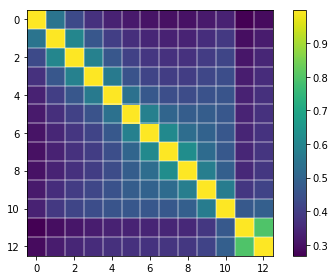

In [26]:
#PT
test_array = [[0.9986987386339168, 0.5490292819773349, 0.4322911268569456, 0.3715252675264482, 0.3389652565278416, 0.3195604692749309, 0.3065510010381001, 0.3004189744964694, 0.3028376745094545, 0.31923054165105486, 0.3383239734846974, 0.2676317757316992, 0.2876250598076922],
              [0.5490292819773372, 0.9986978768312774, 0.6023312726273962, 0.4675254546362832, 0.4023706284236261, 0.3649277143706753, 0.34562524903951974, 0.33727058954444655, 0.3398315567687155, 0.3635743921537145, 0.38973287908107385, 0.29483544332566697, 0.323997733059043],
              [0.43229112686111093, 0.6023312726296881, 0.9986978886777195, 0.5882486900915436, 0.46635841004606676, 0.40908405993514396, 0.3826268700727418, 0.3718281726184058, 0.37312946069258973, 0.3980669724859602, 0.4218403954076326, 0.3133098455106163, 0.3460933047375156],
              [0.37152526752898757, 0.4675254546365381, 0.5882486900900438, 0.9986978697278813, 0.5662587801765196, 0.45361168564179194, 0.417162258461365, 0.4015451316570042, 0.40080385348148373, 0.42406622639207153, 0.4417434966626219, 0.3249236875807852, 0.3592247891303551],
              [0.3389652565278897, 0.40237062842444343, 0.4663584100458213, 0.5662587801774515, 0.9986978539248786, 0.5411238200870523, 0.46832135292835736, 0.44250118360081153, 0.43665953652465633, 0.45262280652658066, 0.4571399548763986, 0.33630920487158855, 0.3701564297452073],
              [0.3195604692770034, 0.36492771437242805, 0.4090840599354871, 0.4536116856414616, 0.5411238200877276, 0.9986978730380498, 0.5858655896086561, 0.5055580026794495, 0.48328433300827706, 0.48183971293022126, 0.4657978660012614, 0.3399311258038187, 0.3722504602343745],
              [0.3065510010357608, 0.34562524903936026, 0.3826268700724504, 0.41716225846339855, 0.468321352927824, 0.5858655896087851, 0.9986978699498957, 0.6138629008375797, 0.5296014949831734, 0.49851146896546505, 0.46615644028432324, 0.34456692546850104, 0.3756945875420183],
              [0.30041897448973337, 0.3372705895458803, 0.37182817262048445, 0.40154513165759526, 0.44250118360063223, 0.5055580026789349, 0.6138629008362079, 0.9986978539366872, 0.6272162500944708, 0.5220160841507346, 0.46987867134192746, 0.34619914526368967, 0.37993974163684324],
              [0.3028376745016525, 0.33983155676966453, 0.3731294606909683, 0.4008038534815171, 0.43665953652448214, 0.4832843330074514, 0.5296014949838407, 0.6272162500953369, 0.9986978291548101, 0.5817382874950849, 0.4879629252382022, 0.35197073371980886, 0.3856026222878985],
              [0.31923054165143694, 0.36357439215335036, 0.3980669724887946, 0.42406622639230984, 0.45262280652691333, 0.48183971293024747, 0.49851146896471316, 0.5220160841484697, 0.5817382874985737, 0.998697823335673, 0.5739338690372038, 0.38615355852636996, 0.41480229802451674],
              [0.33832397348421583, 0.38973287908570714, 0.4218403954064638, 0.44174349666197177, 0.4571399548766939, 0.4657978660021391, 0.4661564402845013, 0.4698786713428718, 0.48796292523974816, 0.5739338690377811, 0.9986978355682314, 0.47237534824650157, 0.4890424787225148],
              [0.2676317757233518, 0.29483544332961886, 0.3133098455106915, 0.32492368758118234, 0.3363092048707184, 0.3399311258038593, 0.34456692547011936, 0.3461991452642375, 0.35197073371908316, 0.38615355852679983, 0.4723753482454185, 0.998697432898258, 0.7965960042213854],
              [0.28762505981306385, 0.32399773305620344, 0.34609330473654504, 0.35922478913047007, 0.37015642974532853, 0.37225046023449787, 0.37569458754097323, 0.37993974163872624, 0.3856026222876194, 0.41480229802428137, 0.4890424787229873, 0.7965960042181098, 0.9986969964126068]]

# plt.figure(figsize=(3, 3), dpi=150)
phone = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])

# enc = features[0, :, :].detach().numpy()
# enc /= np.sqrt((enc**2).sum(1, keepdims=True))
# sims = (enc @ enc.T) / enc.shape[-1]

plt.imshow(test_array)
for boundary in np.where(np.diff(phone))[0] + 0.5:
    plt.axhline(boundary, color='w', linewidth=2, alpha=0.3)
    plt.axvline(boundary, color='w', linewidth=2, alpha=0.3)
plt.colorbar()
plt.tight_layout()


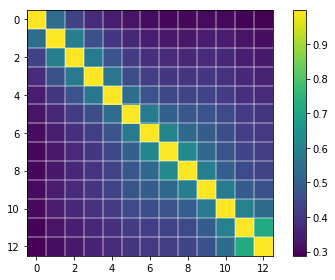

In [25]:
#FT100
test_array = [[0.9986985508184171, 0.5431048459235581, 0.42739518557822276, 0.371306134652534, 0.3423305580294458, 0.3244070240944818, 0.3115458132663751, 0.30408512991879005, 0.3019645031861727, 0.3079910979706693, 0.306718123992387, 0.2939361575107047, 0.2876049731838179],
              [0.543104845930404, 0.9986978668191345, 0.5907387565244145, 0.46371984568673025, 0.40302303787727056, 0.36729700158131307, 0.3479666186413313, 0.3371936608328834, 0.3338833385763594, 0.3422013980369289, 0.3404848253779382, 0.32402741279011965, 0.31649386790080064],
              [0.4273951855778395, 0.5907387565224484, 0.9986978859210089, 0.5847535083942779, 0.4683479049988119, 0.4128638721130404, 0.38575996748938235, 0.37194394082341353, 0.36622991473094074, 0.3737689173231055, 0.36877247409164093, 0.3484872881555887, 0.3402316344730188],
              [0.37130613465175255, 0.46371984569015084, 0.5847535083930263, 0.998697866493964, 0.5656843963415049, 0.4575042151230826, 0.4204419324258068, 0.40186251922550165, 0.39354662388774014, 0.3990053988506537, 0.38913576143155154, 0.36554268040947097, 0.3561977303105259],
              [0.3423305580288229, 0.40302303787783694, 0.4683479049984179, 0.5656843963407749, 0.9986978476192867, 0.5419323373324368, 0.4707514135949027, 0.4428317974586176, 0.42972143464922957, 0.4307360245640868, 0.41496123010116276, 0.38599378680179636, 0.3749276656382816],
              [0.3244070240945339, 0.3672970015841725, 0.41286387211607356, 0.45750421512039136, 0.5419323373312105, 0.9986978809065293, 0.5822113960618396, 0.5057178833372534, 0.4803057177123591, 0.4718077402145536, 0.445662482352684, 0.4114157553032731, 0.3971884068552711],
              [0.3115458132673074, 0.34796661864290607, 0.38575996748903973, 0.42044193242442124, 0.470751413593959, 0.5822113960630181, 0.9986978924405948, 0.6098262428380611, 0.5281887151623299, 0.49693564078858526, 0.4596547164867044, 0.4207915925503601, 0.4047124347458036],
              [0.304085129930163, 0.33719366083301033, 0.3719439408236678, 0.40186251922703264, 0.4428317974601319, 0.5057178833376769, 0.609826242834474, 0.9986978870365851, 0.6215589696391296, 0.5289198613767992, 0.47461442959851513, 0.4312474217437932, 0.41557654986211306],
              [0.30196450318404544, 0.33388333857767777, 0.36622991473301186, 0.39354662388834666, 0.4297214346495107, 0.4803057177127261, 0.5281887151635386, 0.6215589696391107, 0.998697887507595, 0.5937254759932694, 0.49947089521138016, 0.44763655633763033, 0.4299747595772438],
              [0.3079910979783298, 0.34220139803869065, 0.37376891731942274, 0.39900539885100006, 0.4307360245627206, 0.47180774021324284, 0.4969356407884642, 0.5289198613758154, 0.593725475994101, 0.9986978679088686, 0.5825828927596594, 0.494082045213127, 0.4656623970181053],
              [0.30671812399078785, 0.34048482537201163, 0.36877247409214187, 0.3891357614337134, 0.4149612301003076, 0.44566248234665656, 0.45965471648628736, 0.4746144295950707, 0.4994708952127496, 0.5825828927558423, 0.9986978783763992, 0.5984065184213647, 0.5384443721371438],
              [0.29393615752580643, 0.3240274127903385, 0.3484872881558801, 0.3655426804069795, 0.38599378680274943, 0.41141575529993374, 0.42079159255314075, 0.43124742174384156, 0.4476365563423646, 0.4940820452134529, 0.5984065184091517, 0.9986976679632029, 0.7211535927190434],
              [0.28760497321434314, 0.31649386790372963, 0.3402316344704725, 0.3561977303133926, 0.37492766563887187, 0.39718840685159434, 0.40471243474540347, 0.4155765498592394, 0.42997475957674564, 0.46566239702075585, 0.5384443721316851, 0.7211535927121839, 0.9986974331649735]]

# plt.figure(figsize=(3, 3), dpi=150)
phone = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])

# enc = features[0, :, :].detach().numpy()
# enc /= np.sqrt((enc**2).sum(1, keepdims=True))
# sims = (enc @ enc.T) / enc.shape[-1]

plt.imshow(test_array)
for boundary in np.where(np.diff(phone))[0] + 0.5:
    plt.axhline(boundary, color='w', linewidth=2, alpha=0.3)
    plt.axvline(boundary, color='w', linewidth=2, alpha=0.3)
plt.colorbar()
plt.tight_layout()


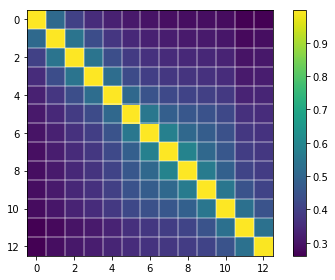

In [37]:
#FT960
test_array = [[0.9986981382886615, 0.5124942758402701, 0.40405413433428133, 0.3553730338401826, 0.32862776008262856, 0.312174374608674, 0.3000560235748543, 0.2921631325358576, 0.2891349404376598, 0.28814096523528837, 0.28423603487662935, 0.26089972882633045, 0.2616264600968248],
              [0.5124942758289344, 0.9986978713603323, 0.5459175227555868, 0.4344266793366458, 0.3784319527342288, 0.3459210577493501, 0.32958354239440024, 0.3194987380697838, 0.3149522997756642, 0.31282705094138924, 0.3067017118060062, 0.2789500855091467, 0.2884105204398868],
              [0.40405413435011917, 0.5459175227477616, 0.9986978963484328, 0.5451882298280946, 0.4376611684506883, 0.3886936855070186, 0.3656273320326815, 0.35198402425677244, 0.34530591198374716, 0.34234314423083195, 0.3336428717494191, 0.2998984366684981, 0.30761415496845057],
              [0.35537303384123237, 0.4344266793392116, 0.5451882298261775, 0.9986978747024532, 0.5241550503813007, 0.4302324967515932, 0.39879638472365103, 0.3810989763960982, 0.3720754632495968, 0.3669788921215999, 0.3544304503652908, 0.3136108268351454, 0.31979812198853214],
              [0.328627760085834, 0.37843195273439845, 0.43766116845098185, 0.5241550503787241, 0.9986978610642483, 0.5087581383472853, 0.4484618137805996, 0.42236486197495254, 0.4092607177385053, 0.4019509521520008, 0.3840892358323635, 0.33470389906323045, 0.33673606773205295],
              [0.3121743746058199, 0.34592105775199955, 0.3886936855108722, 0.4302324967534046, 0.508758138347147, 0.998697889813708, 0.5519997437676301, 0.4845792178273815, 0.4601699091594083, 0.4467491464934086, 0.42143616860683203, 0.3630787092816228, 0.35533314939162924],
              [0.30005602356206523, 0.3295835423984255, 0.3656273320336221, 0.3987963847209381, 0.4484618137792266, 0.5519997437697616, 0.9986978997335897, 0.5820712353384101, 0.5091090859536415, 0.47859868858293325, 0.44523671614561167, 0.38180771706727784, 0.3687330394720741],
              [0.29216313253550436, 0.31949873807177154, 0.35198402425650593, 0.38109897639509144, 0.4223648619733154, 0.4845792178278107, 0.5820712353382612, 0.9986978916584505, 0.5921790502438052, 0.5100316665398524, 0.4622515872128081, 0.39440754141284895, 0.37943291134220375],
              [0.2891349404347639, 0.3149522997791582, 0.3453059119847786, 0.3720754632455394, 0.40926071774160006, 0.4601699091600721, 0.5091090859562989, 0.5921790502418828, 0.9986978540630336, 0.567287214876797, 0.48780128171952053, 0.4127606405196263, 0.39162061593675074],
              [0.2881409652280829, 0.3128270509441459, 0.3423431442325613, 0.36697889212161766, 0.4019509521515306, 0.446749146494877, 0.47859868858043536, 0.5100316665406608, 0.5672872148750612, 0.9986977909247097, 0.5503302086279067, 0.44979189197917285, 0.407972025898871],
              [0.28423603487035987, 0.3067017118085589, 0.33364287175032725, 0.3544304503656473, 0.38408923583311055, 0.42143616860768723, 0.4452367161470378, 0.46225158721299714, 0.48780128171954784, 0.5503302086259924, 0.9986976710108221, 0.5339537365613413, 0.4500377251593997],
              [0.2608997288267714, 0.2789500855085335, 0.29989843666746124, 0.31361082683608926, 0.33470389906376136, 0.363078709283025, 0.38180771706575617, 0.394407541413847, 0.41276064052074296, 0.4497918919784067, 0.5339537365624042, 0.9986966059529824, 0.5373043428457751],
              [0.26162646009725776, 0.28841052043996834, 0.30761415496845806, 0.3197981219885146, 0.3367360677321199, 0.3553331493916461, 0.3687330394721717, 0.37943291134227003, 0.39162061593666203, 0.40797202589891396, 0.4500377251593181, 0.5373043428458212, 0.9948982583687448]]

# plt.figure(figsize=(3, 3), dpi=150)
phone = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])

# enc = features[0, :, :].detach().numpy()
# enc /= np.sqrt((enc**2).sum(1, keepdims=True))
# sims = (enc @ enc.T) / enc.shape[-1]

plt.imshow(test_array)
for boundary in np.where(np.diff(phone))[0] + 0.5:
    plt.axhline(boundary, color='w', linewidth=2, alpha=0.3)
    plt.axvline(boundary, color='w', linewidth=2, alpha=0.3)
plt.colorbar()
plt.tight_layout()


In [81]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

y_A = []
for i in range(len(hct1_A)):
    y_A.append('Ang')
y_H = []
for i in range(len(hct1_H)):
    y_H.append('Hap')
y_N = []
for i in range(len(hct1_N)):
    y_N.append('Neu')
y_S = []
for i in range(len(hct1_S)):
    y_S.append('Sad')
y_C = []
for i in range(len(hct1_C)):
    y_C.append('cal')
y_F = []
for i in range(len(hct1_F)):
    y_F.append('fea')
y_D = []
for i in range(len(hct1_D)):
    y_D.append('dis')
y_X = []
for i in range(len(hct1_X)):
    y_X.append('exi')
print(len(y_A), len(y_H), len(y_N), len(y_S), len(y_C), len(y_F), len(y_D), len(y_X))

y_A = np.array(y_A)
y_H = np.array(y_H)
y_N = np.array(y_N)
y_S = np.array(y_S)
y_C = np.array(y_C)
y_F = np.array(y_F)
y_D = np.array(y_D)
y_X = np.array(y_X)

36999 34760 16733 35308 36274 34153 37677 33319


In [82]:
print(hct1_A.shape)

(36999, 5)


In [83]:
X = np.concatenate((hct1_A, hct1_H, hct1_N, hct1_S, hct1_C, hct1_F, hct1_D, hct1_X), axis=0)
y = np.concatenate((y_A, y_H, y_N, y_S, y_C, y_F, y_D, y_X), axis=0)

print(X.shape, y.shape)

(265223, 5) (265223,)


In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_2d = tsne.fit_transform(X)

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_2d[:,0]
df["comp-2"] = X_2d[:,1]

plt.figure(figsize=(10,8))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 4),
                data=df, legend="full", alpha=0.9).set(title="t-SNE visualization: Mel-spectrogram")
plt.savefig('/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/phdwork/Layerwise/mel_arg.png')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 265223 samples in 0.320s...
[t-SNE] Computed neighbors for 265223 samples in 20.381s...
[t-SNE] Computed conditional probabilities for sample 1000 / 265223
[t-SNE] Computed conditional probabilities for sample 2000 / 265223
[t-SNE] Computed conditional probabilities for sample 3000 / 265223
[t-SNE] Computed conditional probabilities for sample 4000 / 265223
[t-SNE] Computed conditional probabilities for sample 5000 / 265223
[t-SNE] Computed conditional probabilities for sample 6000 / 265223
[t-SNE] Computed conditional probabilities for sample 7000 / 265223
[t-SNE] Computed conditional probabilities for sample 8000 / 265223
[t-SNE] Computed conditional probabilities for sample 9000 / 265223
[t-SNE] Computed conditional probabilities for sample 10000 / 265223
[t-SNE] Computed conditional probabilities for sample 11000 / 265223
[t-SNE] Computed conditional probabilities for sample 12000 / 265223
[t-SNE] Computed conditional proba

[t-SNE] Computed conditional probabilities for sample 120000 / 265223
[t-SNE] Computed conditional probabilities for sample 121000 / 265223
[t-SNE] Computed conditional probabilities for sample 122000 / 265223
[t-SNE] Computed conditional probabilities for sample 123000 / 265223
[t-SNE] Computed conditional probabilities for sample 124000 / 265223
[t-SNE] Computed conditional probabilities for sample 125000 / 265223
[t-SNE] Computed conditional probabilities for sample 126000 / 265223
[t-SNE] Computed conditional probabilities for sample 127000 / 265223
[t-SNE] Computed conditional probabilities for sample 128000 / 265223
[t-SNE] Computed conditional probabilities for sample 129000 / 265223
[t-SNE] Computed conditional probabilities for sample 130000 / 265223
[t-SNE] Computed conditional probabilities for sample 131000 / 265223
[t-SNE] Computed conditional probabilities for sample 132000 / 265223
[t-SNE] Computed conditional probabilities for sample 133000 / 265223
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 240000 / 265223
[t-SNE] Computed conditional probabilities for sample 241000 / 265223
[t-SNE] Computed conditional probabilities for sample 242000 / 265223
[t-SNE] Computed conditional probabilities for sample 243000 / 265223
[t-SNE] Computed conditional probabilities for sample 244000 / 265223
[t-SNE] Computed conditional probabilities for sample 245000 / 265223
[t-SNE] Computed conditional probabilities for sample 246000 / 265223
[t-SNE] Computed conditional probabilities for sample 247000 / 265223
[t-SNE] Computed conditional probabilities for sample 248000 / 265223
[t-SNE] Computed conditional probabilities for sample 249000 / 265223
[t-SNE] Computed conditional probabilities for sample 250000 / 265223
[t-SNE] Computed conditional probabilities for sample 251000 / 265223
[t-SNE] Computed conditional probabilities for sample 252000 / 265223
[t-SNE] Computed conditional probabilities for sample 253000 / 265223
[t-SNE] Computed con

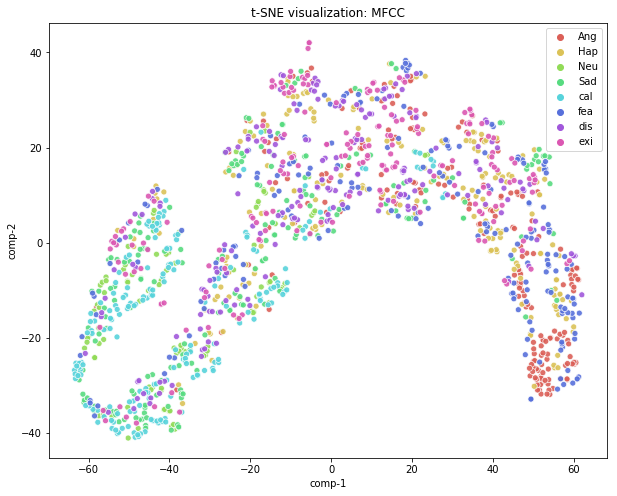

In [68]:
tsne = TSNE(n_components=2)
X_2d = tsne.fit_transform(X)

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_2d[:,0]
df["comp-2"] = X_2d[:,1]

plt.figure(figsize=(10,8))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 8),
                data=df, legend="full", alpha=0.9).set(title="t-SNE visualization: MFCC")
plt.savefig('/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/phdwork/Layerwise/RAVDESS_mfcc.png')